In [16]:
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegressionCV

import sys
sys.path.append('../../')
from src.skmatter.decomposition.pcovc_new import PCovC

plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['scatter.edgecolors'] = "k"

random_state = 0
n_components = 2

In [17]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
bcancer = datasets.load_breast_cancer()
X, y = bcancer.data, bcancer.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
from sklearn.linear_model import LogisticRegression


model_ss = PCovC(classifier=LogisticRegression(), n_components=2, mixing=0.1, tol=1e-12, space="sample")
model_fs = PCovC(classifier=LogisticRegression(), n_components=2, mixing=0.1, tol=1e-12, space="feature")
np.set_printoptions(threshold=sys.maxsize)

model_ss.fit(X_scaled, y)
model_fs.fit(X_scaled, y)

X_ss = model_ss.transform(X_scaled)
X_fs = model_fs.transform(X_scaled)

r_ss = model_ss.inverse_transform(X_ss)
r_fs = model_fs.inverse_transform(X_fs)

# print(r_ss)
# print(r_fs)
print(r_ss-r_fs)

np.allclose(r_ss, r_fs, 1e-5)



[[-6.09317635e-04 -3.45953764e-04 -6.03489115e-04 -6.14425794e-04
  -1.29327551e-04 -2.40238923e-04 -3.74030863e-04 -4.97732903e-04
  -7.65451006e-05  2.76251403e-04 -4.69053657e-04  6.37425816e-05
  -4.46970655e-04 -5.18408656e-04  1.80374282e-04  6.45204402e-05
   3.65745768e-05 -8.93910378e-05  1.63669114e-04  2.33068479e-04
  -6.49837597e-04 -3.80790136e-04 -6.38613812e-04 -6.47812161e-04
  -2.08830761e-04 -2.44469454e-04 -3.24293893e-04 -4.89248447e-04
  -1.79319995e-04  1.01111072e-05]
 [-7.41976578e-04 -3.18206853e-04 -7.33856249e-04 -7.44043470e-04
  -5.94725030e-05 -2.68030326e-04 -4.30501046e-04 -5.67905296e-04
  -3.22751725e-05  3.61744307e-04 -5.52027348e-04  8.46634117e-05
  -5.36517727e-04 -6.09795056e-04  2.39553394e-04  7.62812891e-06
  -1.33959205e-05 -1.63095002e-04  1.73887771e-04  2.05631777e-04
  -7.53974269e-04 -3.15849333e-04 -7.42827602e-04 -7.48528504e-04
  -7.73384172e-05 -2.35338664e-04 -3.33870951e-04 -5.24120796e-04
  -9.09965714e-05  8.95755124e-05]
 [-6.9

False

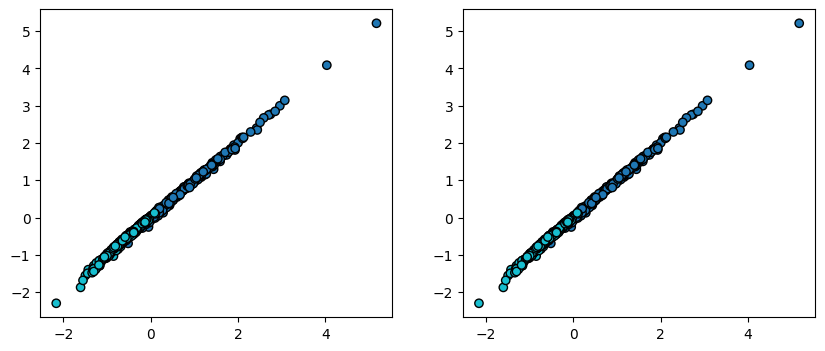

In [20]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(10, 4))
axis1.scatter(r_ss[:, 2], r_ss[:, 3], c=y)
axis2.scatter(r_fs[:, 2], r_fs[:, 3], c=y)

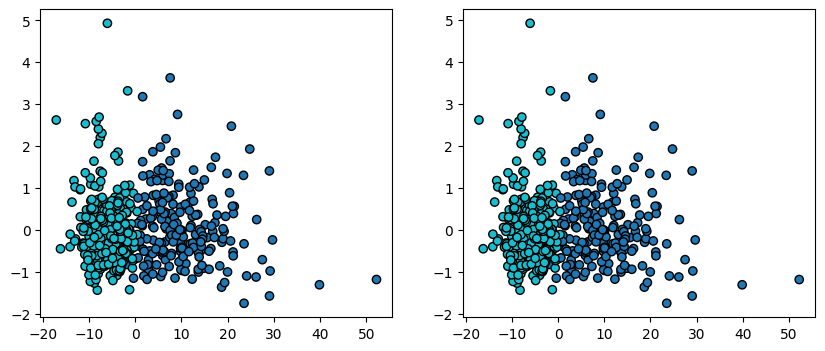

In [21]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(10, 4))
axis1.scatter(X_ss[:, 0], X_ss[:, 1], c=y)
axis2.scatter(X_fs[:, 0], X_fs[:, 1], c=y)

0.9156414762741653
(569, 1)
0.9859402460456942
[-1.4816701]
0


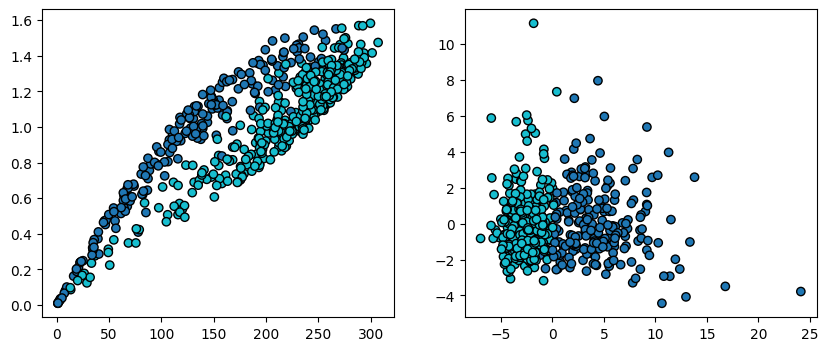

In [ ]:
from sklearn.calibration import LinearSVC
from sklearn.svm import SVC
from src.skmatter.decomposition.kernel_pcovc_new import KernelPCovC
from sklearn.metrics import accuracy_score

model = KernelPCovC(mixing=0.5, kernel="rbf", classifier=SVC(kernel="rbf"), n_components=2, fit_inverse_transform=True)
model.fit(X_scaled, y)
T = model.transform(X_scaled)
y_pred = model.predict(X_scaled)
print(accuracy_score(y, y_pred))
print(model.decision_function(X_scaled).shape) # we should have KPCovC match PCovC decision function shape 

model2 = PCovC(mixing=0.5, classifier=LinearSVC(), n_components=2)
model2.fit(X_scaled, y)
T_2 = model2.transform(X_scaled)
y_pred_2 = model2.predict(X_scaled)
print(accuracy_score(y, y_pred_2))
print(model2.decision_function(X_scaled)[100])
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(10,4))
axis1.scatter(T[:, 0], T[:, 1], c=y)
axis2.scatter(T_2[:, 0], T_2[:, 1], c=y)
# DecisionBoundaryDisplay.from_estimator(
#           estimator=model.classifier_, 
#           X=T, 
#           ax=axis1, 
#           #eps=1,
#           response_method="predict", 
#      )

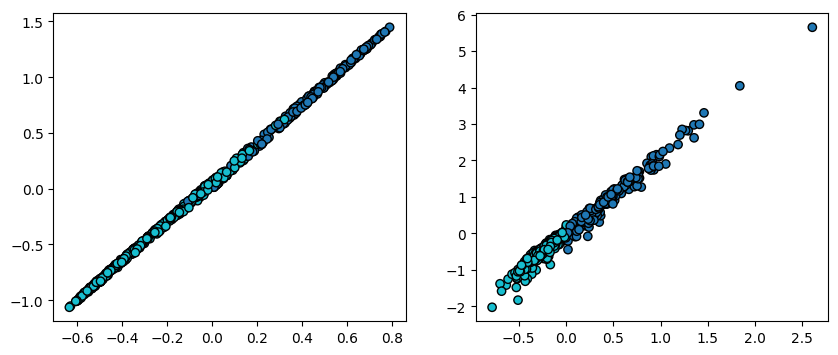

In [23]:
rT = model.inverse_transform(T)
rT2 = model2.inverse_transform(T_2)

fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(10,4))
axis1.scatter(rT[:, 1], rT[:, 2], c=y)
axis2.scatter(rT2[:, 1], rT2[:, 2], c=y)